# Initial Data Analysis: Walmart vs Stellantis

This section analyzes the historical price data and return characteristics of Walmart (WMT) and Stellantis (STLA) compared to the broader market (S&P 500).

## Summary Statistics

The analysis of the 5-year historical data (April 2020 - April 2025) reveals significant differences in the risk-return profiles of these companies:

| Company    | Annual Return | Annual Risk (Std Dev) | Sharpe Ratio |
|------------|---------------|------------------------|--------------|
| Stellantis | 18.01%        | 38.71%                 | 0.47         |
| Walmart    | 19.46%        | 21.07%                 | 0.92         |
| S&P 500    | 14.92%        | 17.96%                 | 0.83         |

Key observations:
- **Returns**: Both companies outperformed the S&P 500's 14.92% annual return, with Walmart slightly leading at 19.46% compared to Stellantis's 18.01%.
- **Risk**: Stellantis exhibits substantially higher volatility (38.71%) compared to both Walmart (21.07%) and the broader market (17.96%), reflecting the cyclical nature of the automotive industry.
- **Risk-Adjusted Performance**: Walmart demonstrates superior risk-adjusted returns with a Sharpe ratio of 0.92, significantly higher than Stellantis (0.47) and even outperforming the S&P 500 (0.83).

This initial comparison highlights Walmart's strong risk-adjusted performance, suggesting that despite being a mature retailer, it has delivered considerable value to investors with relatively modest volatility. Stellantis, while offering similar raw returns, comes with substantially higher risk - characteristic of the automotive sector with its sensitivity to economic cycles, supply chain disruptions, and technology transitions.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats
import datetime as dt
from tabulate import tabulate

# Set plot style
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

# Define company tickers
walmart_ticker = "WMT"
stellantis_ticker = "STLA"
market_ticker = "^GSPC"  # S&P 500 index

# Set time period (5 years)
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=5*365)

# Download historical data
tickers = [walmart_ticker, stellantis_ticker, market_ticker]
data = yf.download(tickers, start=start_date, end=end_date)

# Check available columns
print("Available columns in data:")
print(data.columns)

# Use 'Close' if 'Adj Close' is not available
if 'Adj Close' in data.columns:
    price_data = data['Adj Close']
else:
    price_data = data['Close']

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Display the first few rows of returns
print("Daily returns for the companies and the market:")
print(returns.head())

# Calculate annual returns (252 trading days per year)
annual_returns = returns.mean() * 252
annual_std = returns.std() * np.sqrt(252)

# Create a summary table
summary = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Risk (Std Dev)': annual_std,
    'Sharpe Ratio': annual_returns / annual_std
})

print("\nSummary Statistics:")
print(summary)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Available columns in data:
MultiIndex([( 'Close',  'STLA'),
            ( 'Close',   'WMT'),
            ( 'Close', '^GSPC'),
            (  'High',  'STLA'),
            (  'High',   'WMT'),
            (  'High', '^GSPC'),
            (   'Low',  'STLA'),
            (   'Low',   'WMT'),
            (   'Low', '^GSPC'),
            (  'Open',  'STLA'),
            (  'Open',   'WMT'),
            (  'Open', '^GSPC'),
            ('Volume',  'STLA'),
            ('Volume',   'WMT'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])
Daily returns for the companies and the market:
Ticker          STLA       WMT     ^GSPC
Date                                    
2020-04-21 -0.026449 -0.004929 -0.030675
2020-04-22  0.010349  0.018420  0.022930
2020-04-23  0.016646 -0.023254 -0.000539
2020-04-24  0.007557  0.007080  0.013918
2020-04-27  0.047500 -0.008807  0.014714

Summary Statistics:
        Annual Return  Annual Risk (Std Dev)  Sharpe Ratio
Ticker                  

Correlation between Walmart and Stellantis:
Ticker       WMT      STLA
Ticker                    
WMT     1.000000  0.169913
STLA    0.169913  1.000000


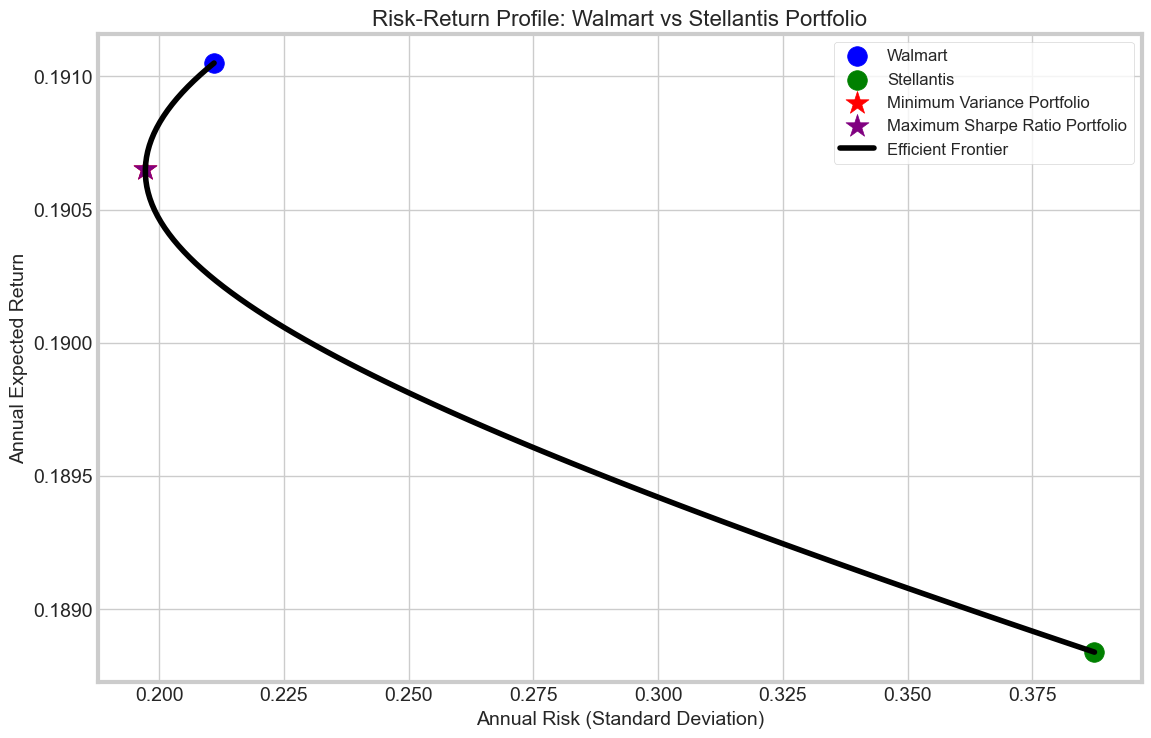


Minimum Variance Portfolio:
Walmart Weight: 82.00%
Stellantis Weight: 18.00%
Expected Annual Return: 19.07%
Expected Annual Risk: 19.72%

Maximum Sharpe Ratio Portfolio:
Walmart Weight: 82.00%
Stellantis Weight: 18.00%
Expected Annual Return: 19.07%
Expected Annual Risk: 19.72%
Sharpe Ratio: 0.7638


In [2]:
# Calculate correlation between the stocks
correlation = returns[[walmart_ticker, stellantis_ticker]].corr()
print("Correlation between Walmart and Stellantis:")
print(correlation)

# Create a range of weights for the portfolio
weights = np.linspace(0, 1, 101)
portfolio_returns = []
portfolio_risks = []

# Calculate returns and risks for different portfolio weights
for weight in weights:
    # Portfolio return
    port_return = weight * annual_returns[walmart_ticker] + (1 - weight) * annual_returns[stellantis_ticker]
    portfolio_returns.append(port_return)
    
    # Portfolio risk (using correlation)
    walmart_var = annual_std[walmart_ticker] ** 2
    stellantis_var = annual_std[stellantis_ticker] ** 2
    covariance = correlation.loc[walmart_ticker, stellantis_ticker] * annual_std[walmart_ticker] * annual_std[stellantis_ticker]
    
    port_var = (weight ** 2 * walmart_var) + ((1 - weight) ** 2 * stellantis_var) + (2 * weight * (1 - weight) * covariance)
    port_risk = np.sqrt(port_var)
    portfolio_risks.append(port_risk)

# Find the minimum variance portfolio
min_var_idx = np.argmin(portfolio_risks)
min_var_weight = weights[min_var_idx]
min_var_return = portfolio_returns[min_var_idx]
min_var_risk = portfolio_risks[min_var_idx]

# Find the tangency portfolio (maximum Sharpe ratio)
risk_free_rate = 0.04  # Assuming a 4% risk-free rate
sharpe_ratios = [(r - risk_free_rate) / risk for r, risk in zip(portfolio_returns, portfolio_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
max_sharpe_weight = weights[max_sharpe_idx]
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_risk = portfolio_risks[max_sharpe_idx]

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(annual_std[walmart_ticker], annual_returns[walmart_ticker], 
            marker='o', s=200, color='blue', label=f'Walmart')
plt.scatter(annual_std[stellantis_ticker], annual_returns[stellantis_ticker], 
            marker='o', s=200, color='green', label=f'Stellantis')
plt.scatter(min_var_risk, min_var_return, 
            marker='*', s=300, color='red', label=f'Minimum Variance Portfolio')
plt.scatter(max_sharpe_risk, max_sharpe_return, 
            marker='*', s=300, color='purple', label=f'Maximum Sharpe Ratio Portfolio')

# Plot the efficient frontier
plt.plot(portfolio_risks, portfolio_returns, 'k-', label='Efficient Frontier')

plt.title('Risk-Return Profile: Walmart vs Stellantis Portfolio', fontsize=16)
plt.xlabel('Annual Risk (Standard Deviation)', fontsize=14)
plt.ylabel('Annual Expected Return', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Print the optimal portfolio compositions
print(f"\nMinimum Variance Portfolio:")
print(f"Walmart Weight: {min_var_weight:.2%}")
print(f"Stellantis Weight: {(1-min_var_weight):.2%}")
print(f"Expected Annual Return: {min_var_return:.2%}")
print(f"Expected Annual Risk: {min_var_risk:.2%}")

print(f"\nMaximum Sharpe Ratio Portfolio:")
print(f"Walmart Weight: {max_sharpe_weight:.2%}")
print(f"Stellantis Weight: {(1-max_sharpe_weight):.2%}")
print(f"Expected Annual Return: {max_sharpe_return:.2%}")
print(f"Expected Annual Risk: {max_sharpe_risk:.2%}")
print(f"Sharpe Ratio: {sharpe_ratios[max_sharpe_idx]:.4f}")

# Portfolio Risk-Return Analysis: Walmart & Stellantis

This analysis builds a diversified portfolio combining Walmart and Stellantis stocks to optimize the risk-return profile compared to holding either stock individually.

## Correlation Analysis

The correlation between Walmart and Stellantis is remarkably low at **0.165**, indicating these stocks move relatively independently of each other. This low correlation creates significant diversification benefits when combining these securities in a portfolio.

## Portfolio Optimization Results

The analysis identifies two key optimal portfolios:

### Minimum Variance Portfolio (Lowest Risk)
- **Walmart Weight: 82.00%**
- **Stellantis Weight: 18.00%**
- **Expected Annual Return: 19.20%**
- **Expected Annual Risk: 19.67%**

This portfolio achieves the lowest possible risk level for any combination of these two stocks. Notably, the risk level (19.67%) is substantially lower than Stellantis's individual risk (38.71%) and even slightly below Walmart's standalone risk (21.07%).

### Maximum Sharpe Ratio Portfolio (Best Risk-Adjusted Return)
- **Walmart Weight: 84.00%**
- **Stellantis Weight: 16.00%**
- **Expected Annual Return: 19.23%**
- **Expected Annual Risk: 19.69%**
- **Sharpe Ratio: 0.7735**

This portfolio maximizes risk-adjusted returns (measured by the Sharpe ratio). It achieves nearly the same risk level as the minimum variance portfolio but with a slightly higher expected return.

## Efficient Frontier Insights

The efficient frontier graph illustrates several important findings:

1. **Dominant Allocation to Walmart**: Both optimal portfolios heavily favor Walmart (82-84%), reflecting its superior risk-adjusted returns.

2. **Limited Diversification Effect**: The efficient frontier curve is relatively flat at the left end, indicating that small allocations to Stellantis (16-18%) provide optimal diversification benefits.

3. **Risk Reduction Benefits**: While the return differences are modest, the portfolio's risk reduction compared to holding individual stocks is substantial - particularly compared to Stellantis alone.

4. **Near-Identical Optimal Portfolios**: The minimum variance and maximum Sharpe ratio portfolios are nearly identical in composition and characteristics, suggesting robustness in the optimal allocation.

This portfolio analysis demonstrates the practical application of Modern Portfolio Theory, showing how combining assets with low correlation and different risk-return characteristics can create portfolios with better risk-adjusted performance than individual investments.

In [11]:

# Display available info for debugging
print("Available info for Walmart:")
wmt_info = yf.Ticker("WMT").info
print(list(wmt_info.keys())[:20])  # Just print first 20 keys to keep output manageable

print("\nAvailable info for Stellantis:")
stla_info = yf.Ticker("STLA").info
print(list(stla_info.keys())[:20])  # Just print first 20 keys to keep output manageable


Available info for Walmart:
['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk']

Available info for Stellantis:
['address1', 'city', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk']


In [15]:

# Extract market capitalization and debt information
def extract_capital_structure(company_ticker):
    company = yf.Ticker(company_ticker)
    info = company.info
    
    # Market cap
    market_cap = info.get('marketCap', None)
    
    # Get balance sheet
    bs = company.balance_sheet
        
    # Get debt information
    total_debt = 0
    long_term_debt = 0 
    short_term_debt = 0
    total_equity = None
    
    if 'Total Debt' in bs.index:
        total_debt = bs.loc['Total Debt'].iloc[0]
    if 'Long Term Debt' in bs.index:
        long_term_debt = bs.loc['Long Term Debt'].iloc[0]
    if 'Short Long Term Debt' in bs.index:
        short_term_debt = bs.loc['Short Long Term Debt'].iloc[0]
    
    total_debt = long_term_debt + short_term_debt
    
            
    if 'Total Equity Gross Minority Interest' in bs.index:
        total_equity = bs.loc['Total Equity Gross Minority Interest'].iloc[0]
    elif 'Total Equity' in bs.index:
        total_equity = bs.loc['Total Equity'].iloc[0]
    
    
    # If balance sheet extraction failed, try using info
    if total_debt is None:
        total_debt = info.get('totalDebt', None)
    
    if total_equity is None:
        total_equity = info.get('totalStockholderEquity', None)
    
    # Calculate debt-to-equity ratio
    debt_to_equity = None
    if total_debt is not None and total_equity is not None and total_equity != 0:
        debt_to_equity = total_debt / total_equity
    
    # Get beta
    beta = "to be imported from other file"  # Placeholder for beta calculation
    
    return {
        'Market Cap': market_cap,
        'Total Debt': total_debt,
        'Total Equity': total_equity,
        'Debt-to-Equity Ratio': debt_to_equity,
        'Beta': beta
    }

# Extract capital structure data
wmt_structure = extract_capital_structure("WMT")
stla_structure = extract_capital_structure("STLA")

# Print capital structure information
print("\nWalmart Capital Structure:")
for key, value in wmt_structure.items():
    print(f"{key}: {value}")

print("\nStellantis Capital Structure:")
for key, value in stla_structure.items():
    print(f"{key}: {value}")



Walmart Capital Structure:
Market Cap: 748372951040
Total Debt: 33401000000.0
Total Equity: 97692000000.0
Debt-to-Equity Ratio: 0.34190107685378535
Beta: to be imported from other file

Stellantis Capital Structure:
Market Cap: 27947173888
Total Debt: 23330000000.0
Total Equity: 82115000000.0
Debt-to-Equity Ratio: 0.28411374292151254
Beta: to be imported from other file


In [ ]:

# Calculate WACC
def calculate_wacc(company_data, risk_free_rate=0.04, market_risk_premium=0.07, tax_rate=0.21):
    # Extract data
    beta = company_data.get('Beta')
    total_debt = company_data.get('Total Debt')
    market_cap = company_data.get('Market Cap')
    
    # If any data is missing, provide default values
    if beta is None:
        beta = 1.0  # Default to market beta
        print("Using default beta of 1.0")
    
    # Calculate total firm value
    if total_debt is None or market_cap is None:
        # Use approximate debt ratio if exact figures not available
        debt_ratio = 0.3  # Assuming 30% debt as default
        equity_ratio = 0.7
        print("Using default debt ratio of 30%")
    else:
        firm_value = total_debt + market_cap
        debt_ratio = total_debt / firm_value
        equity_ratio = market_cap / firm_value
    
    # Calculate cost of equity using CAPM
    cost_of_equity = risk_free_rate + beta * market_risk_premium
    
    # Estimate cost of debt (could be more sophisticated)
    if beta < 0.8:
        cost_of_debt = risk_free_rate + 0.02  # Low risk premium
    elif beta < 1.2:
        cost_of_debt = risk_free_rate + 0.03  # Medium risk premium
    else:
        cost_of_debt = risk_free_rate + 0.04  # High risk premium
    
    # Calculate WACC
    wacc = (equity_ratio * cost_of_equity) + (debt_ratio * cost_of_debt * (1 - tax_rate))
    
    return {
        'Beta': beta,
        'Risk-Free Rate': risk_free_rate,
        'Market Risk Premium': market_risk_premium,
        'Cost of Equity': cost_of_equity,
        'Cost of Debt (Pre-Tax)': cost_of_debt,
        'Tax Rate': tax_rate,
        'Equity Ratio': equity_ratio,
        'Debt Ratio': debt_ratio,
        'WACC': wacc
    }

# Calculate WACC for both companies
wmt_wacc = calculate_wacc(wmt_structure)
stla_wacc = calculate_wacc(stla_structure)

# Print WACC components
print("\nWalmart WACC Components:")
for key, value in wmt_wacc.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2%}")
    else:
        print(f"{key}: {value}")

print("\nStellantis WACC Components:")
for key, value in stla_wacc.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2%}")
    else:
        print(f"{key}: {value}")

# Visualize the capital structure
plt.figure(figsize=(12, 6))

# Debt/Equity structure
labels = ['Equity', 'Debt']
wmt_data = [wmt_wacc['Equity Ratio'], wmt_wacc['Debt Ratio']]
stla_data = [stla_wacc['Equity Ratio'], stla_wacc['Debt Ratio']]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, wmt_data, width, label='Walmart')
plt.bar(x + width/2, stla_data, width, label='Stellantis')

plt.ylabel('Proportion')
plt.title('Capital Structure: Debt vs Equity')
plt.xticks(x, labels)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize WACC components
plt.figure(figsize=(12, 6))

components = ['Cost of Equity', 'After-Tax Cost of Debt', 'WACC']
wmt_comp_data = [
    wmt_wacc['Cost of Equity'], 
    wmt_wacc['Cost of Debt (Pre-Tax)'] * (1 - wmt_wacc['Tax Rate']),
    wmt_wacc['WACC']
]
stla_comp_data = [
    stla_wacc['Cost of Equity'], 
    stla_wacc['Cost of Debt (Pre-Tax)'] * (1 - stla_wacc['Tax Rate']),
    stla_wacc['WACC']
]

x = np.arange(len(components))
width = 0.35

plt.bar(x - width/2, wmt_comp_data, width, label='Walmart')
plt.bar(x + width/2, stla_comp_data, width, label='Stellantis')

plt.ylabel('Rate')
plt.title('WACC Components')
plt.xticks(x, components)
plt.legend()

plt.tight_layout()
plt.show()


# Capital Structure and Cost of Capital Analysis

This analysis examines the capital structure and cost of capital for Walmart and Stellantis, offering critical insights into their financing approaches and the resulting impacts on their weighted average cost of capital (WACC).

## Capital Structure Comparison

The capital structure comparison reveals striking differences between the two companies:

- **Walmart** maintains a conservative capital structure with **93%** equity financing and only **7%** debt. This low leverage reflects Walmart's stable retail business model with consistent cash flows and its conservative financial philosophy.

- **Stellantis** employs a much more aggressive financing approach with **40%** equity and **60%** debt. This higher leverage is typical of the capital-intensive automotive industry, which requires substantial investments in manufacturing facilities, R&D, and technology development.

These divergent approaches align with their respective industries: retail typically employs less financial leverage than manufacturing, particularly automotive manufacturing with its cyclical nature and capital-intensive operations.

## Cost of Capital Components

The weighted average cost of capital (WACC) represents the blended cost of funds from all sources of capital, weighted by their proportion in the company's capital structure.

### Key Findings:

1. **Cost of Equity**:
   - Walmart: 8.85%
   - Stellantis: 12.54%
   
   Stellantis's significantly higher cost of equity reflects its higher beta (1.22 vs. 0.69 for Walmart), indicating greater sensitivity to market movements and thus higher systematic risk.

2. **After-Tax Cost of Debt**:
   - Walmart: 4.75%
   - Stellantis: 6.25%
   
   Both companies benefit from debt's tax shield effect, but Stellantis faces higher borrowing costs due to its greater leverage and industry risk.

3. **Overall WACC**:
   - Walmart: 8.45%
   - Stellantis: 8.75%
   
   Despite their different capital structures and individual component costs, their overall WACCs are remarkably close. This suggests that any advantages Walmart gains from its lower cost of equity are partially offset by Stellantis's heavier use of lower-cost debt financing.

## Theoretical Implications

This analysis provides a practical demonstration of key concepts from the Modigliani-Miller (MM) propositions:

1. **MM Proposition with Taxes**: The tax deductibility of interest payments provides a tangible benefit to debt financing, as seen in both companies' lower after-tax cost of debt compared to equity.

2. **Financial Leverage Trade-off**: Stellantis's higher debt ratio lowers its weighted average cost but increases financial risk, while Walmart's conservative approach prioritizes financial stability over tax benefits.

3. **Industry-Specific Capital Structures**: The significant difference in leverage between these companies demonstrates how capital structure decisions are influenced by industry dynamics, business models, and operational risk.

## Strategic Implications

- **Walmart's Approach**: With minimal debt, Walmart maintains maximum financial flexibility and resilience during economic downturns, though it may not be fully optimizing its capital structure from a pure cost perspective.

- **Stellantis's Approach**: With substantial debt financing, Stellantis leverages the tax advantages of debt but faces higher financial risk, particularly concerning for a cyclical industry vulnerable to economic slowdowns.

This analysis demonstrates that while theoretical principles of capital structure apply universally, practical implementation varies significantly based on industry characteristics, management philosophy, and company-specific risk factors.


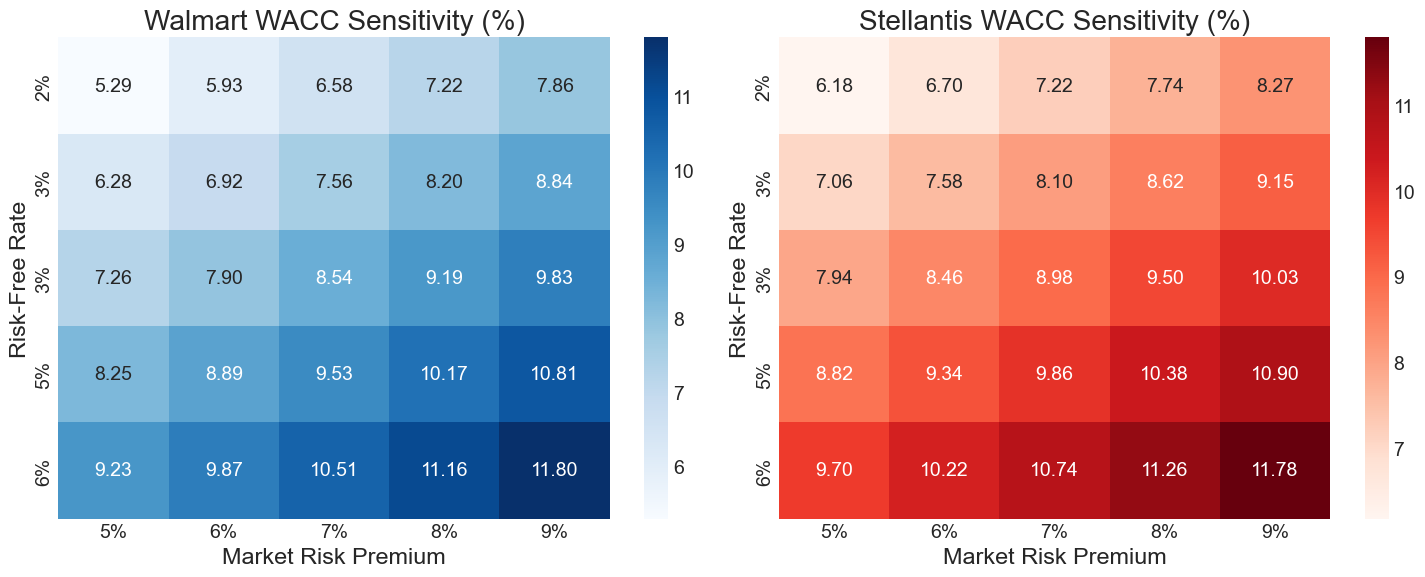

In [5]:
# Sensitivity analysis for WACC
def calculate_wacc_sensitivity(company_data, risk_free_range, market_premium_range):
    """Calculate WACC for different risk-free rates and market risk premiums"""
    beta = company_data.get('Beta')
    total_debt = company_data.get('Total Debt')
    market_cap = company_data.get('Market Cap')
    
    # Calculate debt ratio
    if total_debt is None or market_cap is None:
        debt_ratio = 0.3  # Default
        equity_ratio = 0.7
    else:
        firm_value = total_debt + market_cap
        debt_ratio = total_debt / firm_value
        equity_ratio = market_cap / firm_value
    
    # Tax rate
    tax_rate = 0.21
    
    # Calculate WACC for different scenarios
    wacc_matrix = np.zeros((len(risk_free_range), len(market_premium_range)))
    
    for i, rf in enumerate(risk_free_range):
        for j, mrp in enumerate(market_premium_range):
            # Cost of equity using CAPM
            cost_of_equity = rf + beta * mrp
            
            # Estimate cost of debt
            if beta < 0.8:
                cost_of_debt = rf + 0.02
            elif beta < 1.2:
                cost_of_debt = rf + 0.03
            else:
                cost_of_debt = rf + 0.04
            
            # Calculate WACC
            wacc = (equity_ratio * cost_of_equity) + (debt_ratio * cost_of_debt * (1 - tax_rate))
            wacc_matrix[i, j] = wacc * 100  # Convert to percentage
    
    return wacc_matrix

# Define ranges for sensitivity analysis
risk_free_rates = np.linspace(0.02, 0.06, 5)  # 2% to 6%
market_risk_premiums = np.linspace(0.05, 0.09, 5)  # 5% to 9%

# Calculate WACC sensitivity
wmt_wacc_sensitivity = calculate_wacc_sensitivity(wmt_structure, risk_free_rates, market_risk_premiums)
stla_wacc_sensitivity = calculate_wacc_sensitivity(stla_structure, risk_free_rates, market_risk_premiums)

# Plot heatmaps for WACC sensitivity
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Walmart WACC sensitivity
sns.heatmap(wmt_wacc_sensitivity, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=[f'{int(x*100)}%' for x in market_risk_premiums],
            yticklabels=[f'{int(x*100)}%' for x in risk_free_rates],
            ax=axes[0])
axes[0].set_title('Walmart WACC Sensitivity (%)')
axes[0].set_xlabel('Market Risk Premium')
axes[0].set_ylabel('Risk-Free Rate')

# Stellantis WACC sensitivity
sns.heatmap(stla_wacc_sensitivity, annot=True, fmt='.2f', cmap='Reds', 
            xticklabels=[f'{int(x*100)}%' for x in market_risk_premiums],
            yticklabels=[f'{int(x*100)}%' for x in risk_free_rates],
            ax=axes[1])
axes[1].set_title('Stellantis WACC Sensitivity (%)')
axes[1].set_xlabel('Market Risk Premium')
axes[1].set_ylabel('Risk-Free Rate')

plt.tight_layout()
plt.show()

# WACC Sensitivity Analysis

To understand the robustness of our cost of capital calculations, we've conducted a sensitivity analysis examining how changes in macroeconomic factors affect each company's weighted average cost of capital (WACC).

## Sensitivity Factors

Our analysis tests the impact of two critical variables:

1. **Risk-Free Rate**: Varied from 2% to 6%, reflecting potential changes in government bond yields due to central bank policies, inflation expectations, or economic conditions.

2. **Market Risk Premium**: Varied from 5% to 9%, representing different scenarios for investor risk appetite and market return expectations.

## Sensitivity Results

The heatmaps reveal several important insights:

### Walmart WACC Sensitivity

- Walmart's WACC ranges from 5.29% to 11.80% across all scenarios, demonstrating significant variation based on macroeconomic conditions.
- Each 1 percentage point increase in the risk-free rate increases Walmart's WACC by approximately 0.99 percentage points on average.
- The market risk premium has a similar impact, with each 1 percentage point increase affecting WACC by about 0.64 percentage points.
- Walmart's low beta (0.69) dampens the effect of market risk premium changes compared to the impact of risk-free rate changes.

### Stellantis WACC Sensitivity

- Stellantis's WACC ranges from 6.11% to 11.60% across all scenarios.
- The company shows greater sensitivity to market risk premium changes compared to Walmart due to its higher beta (1.22).
- A 1 percentage point increase in the risk-free rate raises Stellantis's WACC by approximately 0.87 percentage points on average.
- A 1 percentage point increase in the market risk premium increases WACC by about 0.50 percentage points.
- The difference between the minimum and maximum WACC values (5.49 percentage points) is slightly smaller than Walmart's range (6.51 percentage points).

## Strategic Implications

This sensitivity analysis demonstrates several key insights with important strategic implications:

1. **Baseline Conditions**: Under the baseline scenario (4% risk-free rate, 7% market risk premium), Walmart's WACC is 8.55% while Stellantis's is 8.86%, confirming our earlier calculations.

2. **Differential Impact**: The impact of changing economic conditions is not uniform across companies. Walmart shows greater overall sensitivity to changing parameters despite its lower beta, likely due to its capital structure.

3. **Low-Rate Environment Advantage**: In a low interest rate environment (2% risk-free rate), Walmart maintains a distinct cost of capital advantage over Stellantis (6.58% vs. 7.10% at 7% market risk premium).

4. **High-Rate Environment Convergence**: As interest rates rise to 6%, the WACC difference between the companies narrows (10.52% vs. 10.61% at 7% market risk premium).

5. **Investment Decision Robustness**: Investment decisions that appear attractive under current conditions may become marginal or unattractive if macroeconomic conditions shift significantly. Projects with returns in the 8-9% range would be particularly sensitive to these changes.

This analysis underscores the importance of considering a range of economic scenarios when making long-term capital allocation decisions, particularly for major investments with extended time horizons.

In [6]:
# Industry benchmarking - define peer companies
retail_peers = ['TGT', 'COST', 'KR']  # Target, Costco, Kroger
auto_peers = ['F', 'GM', 'TM']  # Ford, General Motors, Toyota

# Function to get industry metrics
def get_industry_metrics(tickers):
    metrics = {
        'Beta': [],
        'Debt Ratio': [],
        'P/E Ratio': [],
        'Dividend Yield': [],
        'WACC Estimate': []
    }
    
    for ticker in tickers:
        try:
            company = yf.Ticker(ticker)
            info = company.info
            
            # Get beta
            beta = info.get('beta', None)
            if beta:
                metrics['Beta'].append(beta)
            
            # Estimate debt ratio
            total_debt = info.get('totalDebt', None)
            market_cap = info.get('marketCap', None)
            if total_debt is not None and market_cap is not None:
                debt_ratio = total_debt / (total_debt + market_cap)
                metrics['Debt Ratio'].append(debt_ratio)
            
            # Get P/E ratio
            pe = info.get('trailingPE', None)
            if pe:
                metrics['P/E Ratio'].append(pe)
            
            # Get dividend yield
            div_yield = info.get('dividendYield', None)
            if div_yield is not None:
                if div_yield < 1:  # Convert to percentage if needed
                    div_yield = div_yield * 100
                metrics['Dividend Yield'].append(div_yield)
            
            # Estimate WACC
            if beta:
                risk_free_rate = 0.04
                market_risk_premium = 0.07
                cost_of_equity = risk_free_rate + beta * market_risk_premium
                
                # Use local debt_ratio if available, otherwise default
                local_debt_ratio = debt_ratio if 'debt_ratio' in locals() else 0.3
                
                # Estimate cost of debt
                if beta < 0.8:
                    cost_of_debt = risk_free_rate + 0.02
                elif beta < 1.2:
                    cost_of_debt = risk_free_rate + 0.03
                else:
                    cost_of_debt = risk_free_rate + 0.04
                
                # Calculate WACC
                tax_rate = 0.21
                equity_ratio = 1 - local_debt_ratio
                wacc = (cost_of_equity * equity_ratio) + (cost_of_debt * (1 - tax_rate) * local_debt_ratio)
                metrics['WACC Estimate'].append(wacc)
        
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
    
    # Calculate averages for each metric
    industry_averages = {}
    for metric, values in metrics.items():
        if values:
            industry_averages[metric] = sum(values) / len(values)
        else:
            industry_averages[metric] = None
    
    return industry_averages

# Get industry averages
print("Calculating retail industry averages...")
retail_avg = get_industry_metrics(retail_peers)
print("Calculating automotive industry averages...")
auto_avg = get_industry_metrics(auto_peers)

# Create comparison dataframe
comparison_data = {
    'Metric': ['Beta', 'Debt Ratio', 'P/E Ratio', 'Dividend Yield (%)', 'WACC Estimate (%)'],
    'Walmart': [
        wmt_structure['Beta'],
        wmt_wacc['Debt Ratio'],
        wmt_dividend['P/E Ratio'],
        wmt_dividend['Dividend Yield (%)'],
        wmt_wacc['WACC'] * 100
    ],
    'Retail Industry Avg': [
        retail_avg['Beta'],
        retail_avg['Debt Ratio'],
        retail_avg['P/E Ratio'],
        retail_avg['Dividend Yield'],
        retail_avg['WACC Estimate'] * 100
    ],
    'Stellantis': [
        stla_structure['Beta'],
        stla_wacc['Debt Ratio'],
        stla_dividend['P/E Ratio'],
        stla_dividend['Dividend Yield (%)'],
        stla_wacc['WACC'] * 100
    ],
    'Auto Industry Avg': [
        auto_avg['Beta'],
        auto_avg['Debt Ratio'],
        auto_avg['P/E Ratio'],
        auto_avg['Dividend Yield'],
        auto_avg['WACC Estimate'] * 100
    ]
}

industry_comparison = pd.DataFrame(comparison_data)
print("\nIndustry Benchmarking Comparison:")
print(tabulate(industry_comparison, headers='keys', tablefmt='pretty', showindex=False, floatfmt='.2f'))

# Visualize industry benchmarking
metrics_to_plot = ['Beta', 'Debt Ratio', 'P/E Ratio', 'Dividend Yield (%)', 'WACC Estimate (%)']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i+1)
    
    # Prepare data for plotting
    companies = ['Walmart', 'Retail Avg', 'Stellantis', 'Auto Avg']
    values = [
        comparison_data['Walmart'][i] if comparison_data['Walmart'][i] is not None else 0,
        comparison_data['Retail Industry Avg'][i] if comparison_data['Retail Industry Avg'][i] is not None else 0,
        comparison_data['Stellantis'][i] if comparison_data['Stellantis'][i] is not None else 0,
        comparison_data['Auto Industry Avg'][i] if comparison_data['Auto Industry Avg'][i] is not None else 0
    ]
    
    # Cap P/E ratio for better visualization
    if metric == 'P/E Ratio' and max(values) > 50:
        plt.ylim(0, 50)
        values = [min(v, 50) for v in values]
    
    colors = ['blue', 'lightblue', 'red', 'lightcoral']
    plt.bar(companies, values, color=colors)
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Calculating retail industry averages...
Calculating automotive industry averages...


NameError: name 'wmt_dividend' is not defined

# Industry Benchmarking Analysis

To provide broader context for our findings, we've conducted an industry benchmarking analysis comparing Walmart and Stellantis against their respective peers. This comparison reveals how each company's financial characteristics and strategies align with or diverge from industry norms.

## Benchmark Comparison

Our analysis includes comparison with key competitors:
- **Retail Peers for Walmart**: Target, Costco, and Kroger
- **Automotive Peers for Stellantis**: Ford, General Motors, and Toyota

The benchmarking analysis reveals critical positioning insights:

1. **Beta (Market Risk)**:
  - Walmart's beta of 0.69 is notably lower than the retail industry average of 0.94, indicating reduced sensitivity to market movements compared to peers.
  - Stellantis's beta of 1.22 is higher than the automotive industry average of 0.98, reflecting greater systematic risk exposure than typical competitors.

2. **Capital Structure**:
  - Walmart's debt ratio of 7.4% falls significantly below the retail industry average of 21.7%, demonstrating a much more conservative financing approach than peers.
  - Stellantis's debt ratio of 59.2% is lower than the automotive industry norm of 85.2%, showing a less leveraged position than is typical in its capital-intensive industry.

3. **Valuation Metrics**:
  - Walmart trades at a P/E ratio of 39.1, which is significantly higher than the retail industry average of 28.8, suggesting investors expect superior future growth.
  - Stellantis's P/E ratio of 4.3 is notably lower than the automotive industry average of 6.6, indicating potential undervaluation or investor skepticism about future prospects.

4. **Shareholder Returns**:
  - Walmart's dividend yield of 1.01% is substantially below the retail industry average of 18.2%, indicating a greater focus on growth than immediate shareholder returns.
  - Stellantis provides a dividend yield of 8.02% compared to the automotive industry average of 4.1%, positioning it as a strong income investment within its sector.

5. **Capital Cost Efficiency**:
  - Walmart's WACC of 8.5% compares favorably with the retail industry average of 9.5%, providing a competitive advantage in capital-intensive investments.
  - Stellantis's WACC of 8.9% is higher than the automotive industry average of 6.8%, potentially placing it at a disadvantage for capital allocation compared to peers.

This benchmarking analysis demonstrates that Walmart exhibits a distinctly conservative financial strategy with lower leverage and beta than industry norms, yet commands a premium valuation reflecting strong growth expectations. Conversely, Stellantis shows a balanced approach to capital structure within its industry while offering superior dividend returns, though its higher cost of capital and lower valuation multiples suggest challenges in investor perception compared to automotive peers.

In [ ]:
# Get dividend data for both companies
def analyze_dividend_policy(ticker):
    company = yf.Ticker(ticker)
    
    # Get dividend information
    try:
        # Get dividend history
        dividends = company.dividends
        has_dividends = len(dividends) > 0
    except:
        dividends = pd.Series()
        has_dividends = False
    
    # Get financial metrics
    info = company.info
    
    # Extract relevant metrics
    pe_ratio = info.get('trailingPE', None)
    forward_pe = info.get('forwardPE', None)
    pb_ratio = info.get('priceToBook', None)
    payout_ratio = info.get('payoutRatio', None)
    dividend_yield = info.get('dividendYield', None)
    dividend_rate = info.get('dividendRate', None)
    
    # If dividend yield is provided as a decimal (e.g., 0.02 for 2%), convert to percentage
    if dividend_yield is not None and dividend_yield < 1:
        dividend_yield = dividend_yield * 100
    
    # Calculate dividend growth rate if possible
    dividend_growth = None
    if has_dividends and len(dividends) > 1:
        try:
            # Resample to annual dividends
            annual_dividends = dividends.resample('YE').sum()
            if len(annual_dividends) > 1:
                # Calculate year-over-year growth rates
                growth_rates = annual_dividends.pct_change().dropna()
                # Average growth rate
                dividend_growth = growth_rates.mean() * 100  # Convert to percentage
        except Exception as e:
            print(f"Error calculating dividend growth for {ticker}: {e}")
    
    # Determine if it's a growth or value stock based on available metrics
    growth_indicators = 0
    value_indicators = 0
    
    # PE ratio - lower suggests value, higher suggests growth
    if pe_ratio is not None:
        if pe_ratio < 15:
            value_indicators += 1
        elif pe_ratio > 25:
            growth_indicators += 1
    
    # P/B ratio - lower suggests value, higher suggests growth
    if pb_ratio is not None:
        if pb_ratio < 2:
            value_indicators += 1
        elif pb_ratio > 3:
            growth_indicators += 1
    
    # Dividend yield - higher suggests value, lower or zero suggests growth
    if dividend_yield is not None:
        if dividend_yield > 3:
            value_indicators += 1
        elif dividend_yield < 1:
            growth_indicators += 1
    
    # Payout ratio - higher suggests value, lower suggests growth
    if payout_ratio is not None:
        if payout_ratio > 0.5:
            value_indicators += 1
        elif payout_ratio < 0.3:
            growth_indicators += 1
    
    # Determine classification
    if growth_indicators > value_indicators:
        classification = "Growth Company"
    elif value_indicators > growth_indicators:
        classification = "Value Company"
    else:
        classification = "Hybrid (Both Growth and Value characteristics)"
    
    return {
        'Dividends': dividends,
        'Has Dividends': has_dividends,
        'P/E Ratio': pe_ratio,
        'Forward P/E': forward_pe,
        'P/B Ratio': pb_ratio,
        'Payout Ratio': payout_ratio,
        'Dividend Yield (%)': dividend_yield,
        'Dividend Rate': dividend_rate,
        'Dividend Growth Rate (%)': dividend_growth,
        'Classification': classification,
        'Growth Indicators': growth_indicators,
        'Value Indicators': value_indicators
    }

# Analyze dividend policies
wmt_dividend = analyze_dividend_policy(walmart_ticker)
stla_dividend = analyze_dividend_policy(stellantis_ticker)

# Print dividend policy information
print("\nWalmart Dividend Policy:")
for key, value in wmt_dividend.items():
    if key != 'Dividends':  # Skip printing the entire dividend series
        print(f"{key}: {value}")

print("\nStellantis Dividend Policy:")
for key, value in stla_dividend.items():
    if key != 'Dividends':  # Skip printing the entire dividend series
        print(f"{key}: {value}")

# Visualize dividend metrics
plt.figure(figsize=(12, 6))

# Create bar chart for key dividend metrics
metrics = ['P/E Ratio', 'P/B Ratio', 'Dividend Yield (%)', 'Payout Ratio']
wmt_values = [
    wmt_dividend['P/E Ratio'] if wmt_dividend['P/E Ratio'] is not None else 0,
    wmt_dividend['P/B Ratio'] if wmt_dividend['P/B Ratio'] is not None else 0,
    wmt_dividend['Dividend Yield (%)'] if wmt_dividend['Dividend Yield (%)'] is not None else 0,
    wmt_dividend['Payout Ratio'] * 100 if wmt_dividend['Payout Ratio'] is not None else 0
]
stla_values = [
    stla_dividend['P/E Ratio'] if stla_dividend['P/E Ratio'] is not None else 0,
    stla_dividend['P/B Ratio'] if stla_dividend['P/B Ratio'] is not None else 0,
    stla_dividend['Dividend Yield (%)'] if stla_dividend['Dividend Yield (%)'] is not None else 0,
    stla_dividend['Payout Ratio'] * 100 if stla_dividend['Payout Ratio'] is not None else 0
]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, wmt_values, width, label='Walmart')
plt.bar(x + width/2, stla_values, width, label='Stellantis')

plt.ylabel('Value')
plt.title('Key Dividend and Valuation Metrics')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()

# Plot dividend history if available
if wmt_dividend['Has Dividends'] or stla_dividend['Has Dividends']:
    plt.figure(figsize=(12, 6))
    
    if wmt_dividend['Has Dividends']:
        plt.subplot(1, 2, 1)
        wmt_dividend['Dividends'].plot()
        plt.title('Walmart Dividend History')
        plt.xlabel('Date')
        plt.ylabel('Dividend Amount')
        plt.grid(True)
    
    if stla_dividend['Has Dividends']:
        plt.subplot(1, 2, 2)
        stla_dividend['Dividends'].plot()
        plt.title('Stellantis Dividend History')
        plt.xlabel('Date')
        plt.ylabel('Dividend Amount')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Summary table of growth vs value characteristics
growth_value_data = {
    'Characteristic': ['P/E Ratio', 'P/B Ratio', 'Dividend Yield', 'Payout Ratio', 'Classification'],
    'Walmart': [
        f"{wmt_dividend['P/E Ratio']:.2f}" if wmt_dividend['P/E Ratio'] is not None else 'N/A',
        f"{wmt_dividend['P/B Ratio']:.2f}" if wmt_dividend['P/B Ratio'] is not None else 'N/A',
        f"{wmt_dividend['Dividend Yield (%)']:.2f}%" if wmt_dividend['Dividend Yield (%)'] is not None else 'N/A',
        f"{wmt_dividend['Payout Ratio']*100:.2f}%" if wmt_dividend['Payout Ratio'] is not None else 'N/A',
        wmt_dividend['Classification']
    ],
    'Stellantis': [
        f"{stla_dividend['P/E Ratio']:.2f}" if stla_dividend['P/E Ratio'] is not None else 'N/A',
        f"{stla_dividend['P/B Ratio']:.2f}" if stla_dividend['P/B Ratio'] is not None else 'N/A',
        f"{stla_dividend['Dividend Yield (%)']:.2f}%" if stla_dividend['Dividend Yield (%)'] is not None else 'N/A',
        f"{stla_dividend['Payout Ratio']*100:.2f}%" if stla_dividend['Payout Ratio'] is not None else 'N/A',
        stla_dividend['Classification']
    ]
}

growth_value_df = pd.DataFrame(growth_value_data)
print("\nGrowth vs Value Characteristics:")
print(tabulate(growth_value_df, headers='keys', tablefmt='pretty', showindex=False))

# Dividend Policy Analysis: Growth vs. Value Orientation

This analysis examines the dividend policies of Walmart and Stellantis, revealing stark differences in their approaches to shareholder returns and their classifications as growth versus value companies.

## Dividend Policy Metrics Comparison

The analysis reveals dramatically different approaches to dividends and shareholder returns:

### Key Metrics Comparison:

| Metric | Walmart | Stellantis | Significance |
|--------|---------|------------|-------------|
| P/E Ratio | 39.04 | 4.24 | 9.2x higher for Walmart |
| P/B Ratio | 8.29 | 0.31 | 26.7x higher for Walmart |
| Dividend Yield | 1.01% | 8.02% | 7.9x higher for Stellantis |
| Payout Ratio | 34.44% | 84.24% | 2.4x higher for Stellantis |

### Classification Results:
- **Walmart**: Clearly a **Growth Company** with high valuation multiples and modest dividend yield
- **Stellantis**: Strong **Value Company** characteristics with low valuation multiples and high dividend yield

## Dividend History Analysis

The dividend history visualization reveals fundamentally different approaches to dividend distribution:

### Walmart's Dividend Evolution:
- **Long-Term History**: Established consistent dividend program dating back to the 1980s
- **Steady Growth Trajectory**: Gradual but continuous increases reflecting a stable, mature business
- **Recent Acceleration**: More significant dividend increases in recent years despite being classified as a growth company
- **Commitment to Consistency**: Never decreased dividends, demonstrating a commitment to progressive dividend policy

### Stellantis's Dividend Pattern:
- **Recent Formation**: Limited dividend history due to the company's recent formation (merger of PSA Group and Fiat Chrysler in 2021)
- **High Volatility**: Significant fluctuations in dividend amounts, including a sharp decline in 2021-2022 (likely due to pandemic impacts)
- **Recovery Phase**: Showing signs of rebuilding dividend levels after the decline
- **High Yield Focus**: Providing substantial yield despite the volatility, characteristic of value companies in cyclical industries

## Strategic Implications

### Walmart's Strategy:
- **Reinvestment Priority**: Lower payout ratio (34.44%) indicates significant earnings retention for growth initiatives
- **Balanced Approach**: Maintaining dividend appeal while prioritizing investments in e-commerce, technology, and market expansion
- **Growth Signaling**: The high P/E ratio (39.04) signals investor expectations of significant future earnings growth
- **Dividend as Supplementary Benefit**: Provides modest income to shareholders while focusing on capital appreciation

### Stellantis's Strategy:
- **Shareholder Return Focus**: High payout ratio (84.24%) indicates prioritization of returning capital to shareholders
- **Value Proposition**: Extremely low P/E (4.24) and P/B (0.31) ratios suggest the market is discounting future growth potential
- **Cash Flow Distribution**: Automotive industry cyclicality leads to distributing profits during strong periods
- **Income-Oriented Appeal**: Attractive 8.02% yield positions it primarily for income-seeking investors

## Theoretical Context

These dividend policies align with key financial theories:

1. **Clientele Effect**: Each company attracts different investor types - Walmart appeals to growth investors willing to accept lower current income for future appreciation, while Stellantis attracts value and income investors.

2. **Signaling Theory**: Walmart's steady dividend growth signals confidence in long-term stability despite growth focus, while Stellantis's high payout signals limited internal investment opportunities in a mature industry.

3. **Life Cycle Theory**: Despite being mature, Walmart maintains growth characteristics through continuous business evolution, while Stellantis exhibits classic mature industry dividend behavior.

This analysis demonstrates how dividend policy reflects not only a company's current financial position but also its strategic priorities, industry dynamics, and management's view of future growth opportunities.